# Proyecto medicamentos: predicción de medicamentos


[![med.png](https://i.postimg.cc/Dw64YW43/med.png)](https://postimg.cc/K1KY1850)
## Contenido

1. [Planteamiento del problema](#sec_1) ✔️
2. [Exploración del set de datos](#sec_2) ✔️
3. [Limpieza del set de datos](#sec_3) ✔️
4. [Análisis de los datos](#sec_4) ✔️
5. [Preprocesamiento](#sec_5) ✔️
6. [Predicción](#sec_6) ✔️
7. [Reporte final](#sec_7) ✔️

<a id='sec_1'></a>
## 1. Planteamiento del problema


**Medicamento clasificación**: ¡Bienvenido a este emocionante proyecto centrado en el aprendizaje automático para predecir los resultados de tratamientos médicos! En este viaje de descubrimiento, exploraremos técnicas innovadoras para anticipar con precisión cómo responderá un paciente a ciertos medicamentos. Con el poder de los algoritmos de aprendizaje automático y el análisis detallado de datos clínicos, estamos encaminados a ofrecer una visión invaluable sobre la eficacia de los tratamientos. Únete a nosotros en esta emocionante misión para utilizar la ciencia de los datos en beneficio de la salud y el bienestar de los pacientes. 🩺💊


### 1.2. Recursos disponibles
- [Set de datos](drug200.csv)

<a id='sec_2'></a>
## 2. Exploración del set de datos

El objetivo de esta fase es poder familiarizarnos con la información contenida en el set de datos.

1. Leer el set de datos
2. Entender tamaño, columnas y filas del set de datos
3. Entender qué tipos de datos tenemos en cada columna
4. Entender el rango de valores de las variables numéricas y categoricas
6. Verificar si hay datos faltantes y valores duplicados

Llevemos a cabo cada una de estas fases:

### 2.1. Leer el set de datos
y
### 2.2. Entender su tamaño y el contenido de sus filas y columnas

In [1]:
import pandas as pd
df = pd.read_csv(r"F:\EXAMEN 2 LINER CULLANCO\drug200.csv")
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


> **Observación**
> Al leer el data set , se pudo observar que cuenta con 200 filas y 6 columnas, las cuales son provenientes de archivo drug200.

### 2.3. Entender qué tipos de datos tenemos en cada columna

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


>**Observación**
> - Al poder observar a mas detalle el tipo de dato que tiene cada columna, se pudo ver que exiten datos núemricos y categoricos siendo la columna Age y Na_to_K de tipo `int` y `float`.
> - Las columnas `Sex` , `BP`, `Cholesterol` Y `Drug` de tipo categorico.

### 2.4 Entender el rango de valores de las variables numéricas y categoricos

In [3]:
df.select_dtypes(include='number')

,Age,Na_to_K
0,23,25.355
1,47,13.093
2,47,10.114
3,28,7.798
4,61,18.043
...,...,...
195,56,11.567
196,16,12.006
197,52,9.894
198,23,14.020


>**Observación**
>Como se puede observar , en ambas columnas que son de tipo numericas y contienen una información significativa en cuanto al analisis que estamos realizando.

In [4]:
df.select_dtypes(include='object')

,Sex,BP,Cholesterol,Drug
0,F,HIGH,HIGH,DrugY
1,M,LOW,HIGH,drugC
2,M,LOW,HIGH,drugC
3,F,NORMAL,HIGH,drugX
4,F,LOW,HIGH,DrugY
...,...,...,...,...
195,F,LOW,HIGH,drugC
196,M,LOW,HIGH,drugC
197,M,NORMAL,HIGH,drugX
198,M,NORMAL,NORMAL,drugX


In [5]:
for column in df.select_dtypes(exclude='number').columns:
    print('-'*30)
    print(f'** {column} ***')
    print(df[column].value_counts())
    print('-'*30)
    input('Presione enter para continuar...')
    print('')

------------------------------
** Sex ***
Sex
M    104
F     96
Name: count, dtype: int64
------------------------------

------------------------------
** BP ***
BP
HIGH      77
LOW       64
NORMAL    59
Name: count, dtype: int64
------------------------------

------------------------------
** Cholesterol ***
Cholesterol
HIGH      103
NORMAL     97
Name: count, dtype: int64
------------------------------

------------------------------
** Drug ***
Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64
------------------------------



>**Observación**
>Como se puede observar contamos con variables categoricos ordinal y nominales para luego poder transformarlos a int y asi 
>poder realizar una predicción buena

### 2.6 Verificar si hay datos faltantes y valores duplicados

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


>**Observación**
>Al observar las columnas , se pudo evidenciar que no hay columnas con valores faltantes.

>**Sugerencia**
>Se sugiere no se eliminen columnas, puesto que nos podria causar problemas al momento de interpretar el analisis y predecir si un paciente tiene o no diabetes.

In [7]:
df.duplicated().sum()

0

>**Observación**
>Al observar se pudo evidenciar que no hay columnas con valores duplicados

<a id='sec_3'></a>
## 3. Limpieza del set de datos

Etapas de limpieza:

1. Vizualiar distribución de los datos
2. Revisión de valores outliers

Implementemos cada fase teniendo en cuenta las observaciones que hemos hecho hasta el momento.

### 3.1. Vizualiar distribución de los datos

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Na_to_K'}>]], dtype=object)

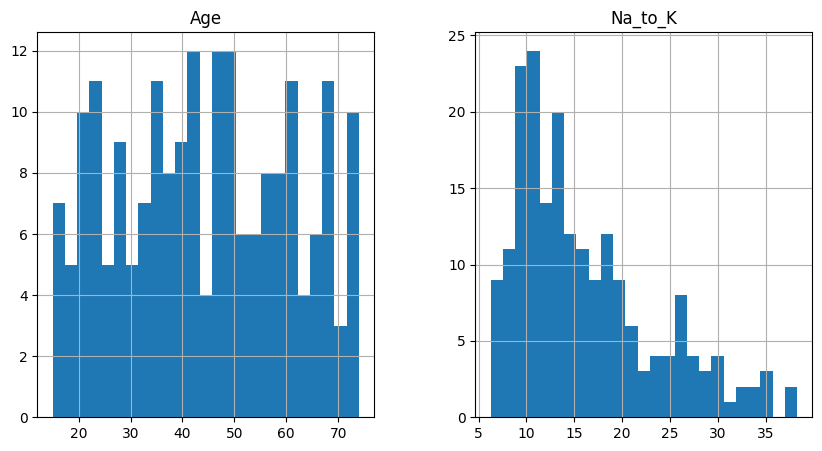

In [9]:
df.hist(bins=25, figsize=(10, 5), xlabelsize='10', ylabelsize='10')

>**Observación**
>Como se puede observar se tiene en ambas columnas una distribución de los valores diferentes

<function matplotlib.pyplot.show(close=None, block=None)>

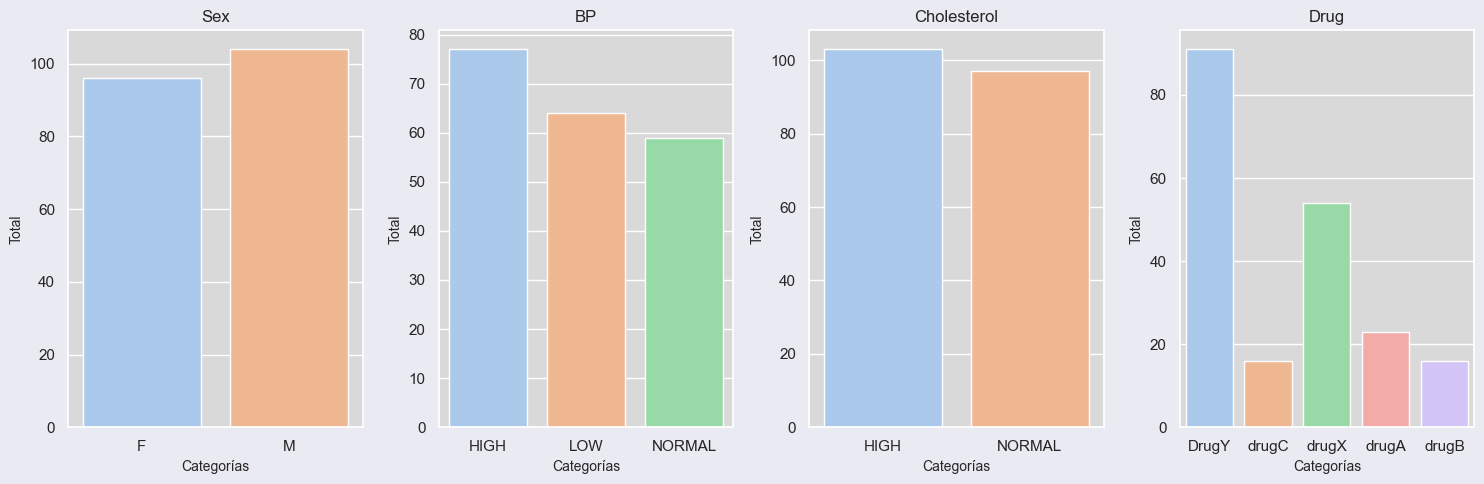

In [10]:
sns.set(style="darkgrid")

plt.rcParams['figure.facecolor'] = '#EAEAF2'
plt.rcParams['axes.facecolor'] = '#D9D9D9'   

columnas_categoricas = df.select_dtypes(include=['object']).columns.tolist()
num_subplots = len(columnas_categoricas)

fig, axes = plt.subplots(nrows=1, ncols=num_subplots, figsize=(15, 5))

for i, columna in enumerate(columnas_categoricas):
    sns.countplot(x = columna, data=df, ax=axes[i], palette='pastel', legend=False,  hue= columna)
    axes[i].set_xlabel('Categorías', fontsize=10)
    axes[i].set_ylabel('Total', fontsize=10)
    axes[i].set_title(columna, fontsize=12)
plt.tight_layout()
plt.show

>**Observación**
>Como se puede observar en cada grafico se tiene diferentes categorias con una distribucón desde 2 categorias hasta 5.

### 3.2. Revisión de valores outliers

In [11]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


3.2.1 Visualización de valores de la columna Age

Text(0.5, 1.0, 'Gráfico de Sex')

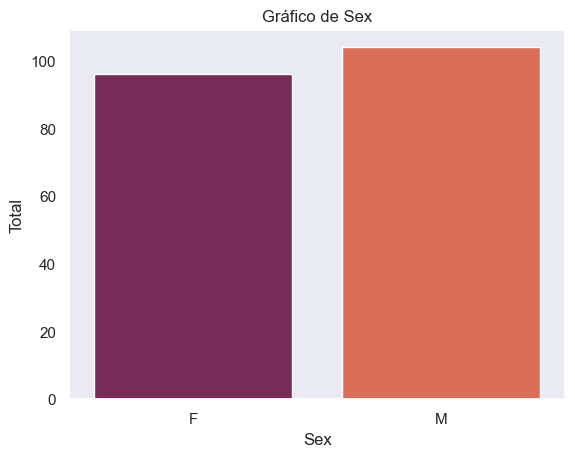

In [12]:
sns.set_theme(style="dark")
sns.countplot(data=df, x="Sex", hue="Sex", palette="rocket", legend=False)
plt.xlabel("Sex")
plt.ylabel("Total")
plt.title("Gráfico de Sex")


> **Observación**
> Como se pudo observar en la columna Sex, por ser una variable categorica no cuenta con valores outliers y solo cuenta con dos categorias que es `F` y `M`

3.2.2 Visualización de valores de la coulumna Age

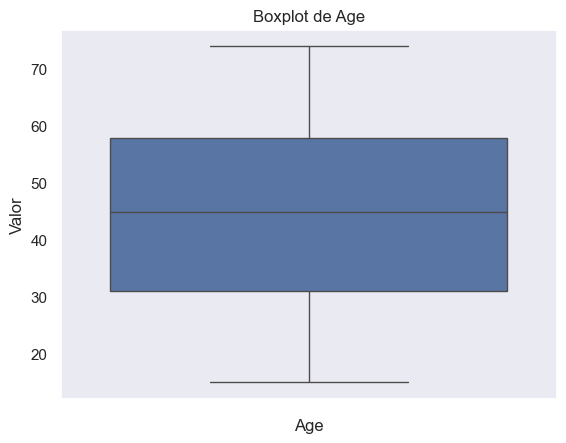

In [13]:
sns.set_theme(style="dark")
sns.boxplot(y ='Age', data=df)
plt.title('Boxplot de Age')
plt.xlabel('Age')
plt.ylabel('Valor')
plt.show()

>**Observación**
> Como se puede observar no se cuenta con valores outliers

3.2.3 Visualización de valores de la coulumna BP

Text(0.5, 1.0, 'Gráfico de BP')

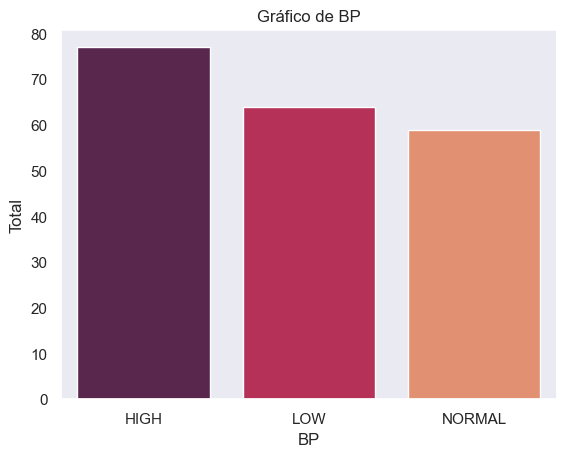

In [14]:
sns.set_theme(style="dark")
sns.countplot(data=df, x="BP", hue="BP", palette="rocket", legend=False)
plt.xlabel("BP")
plt.ylabel("Total")
plt.title("Gráfico de BP")

> **Observación**
> Como se pudo observar en la columna BP, por ser una variable categorica no cuenta con valores outliers y solo cuenta con tres categorias que son: `HIGH`, `LOW` y `NORMAL`

3.2.4 Visualización de valores de la columna Cholesterol

Text(0.5, 1.0, 'Gráfico de Cholesterol')

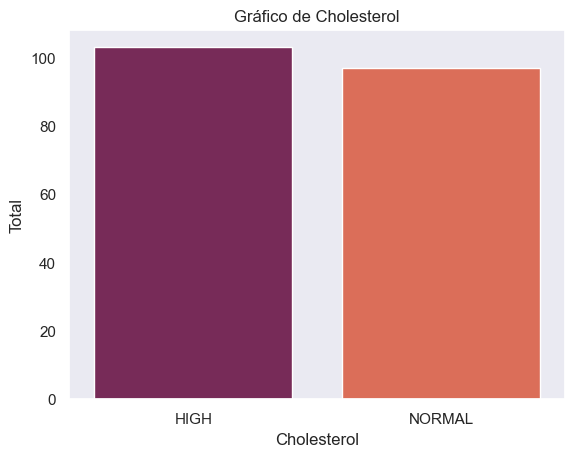

In [15]:
sns.set_theme(style="dark")
sns.countplot(data=df, x="Cholesterol", hue="Cholesterol", palette="rocket", legend=False)
plt.xlabel("Cholesterol")
plt.ylabel("Total")
plt.title("Gráfico de Cholesterol")

> **Observación**
> Como se pudo observar en la columna Cholesterol, por ser una variable categorica no cuenta con valores outliers y solo cuenta con dos categorias que son: `HIGH` y `NORMAL`

3.2.5 Visualización de valores de la coulumna Na_to_K

Text(0, 0.5, 'Valor')

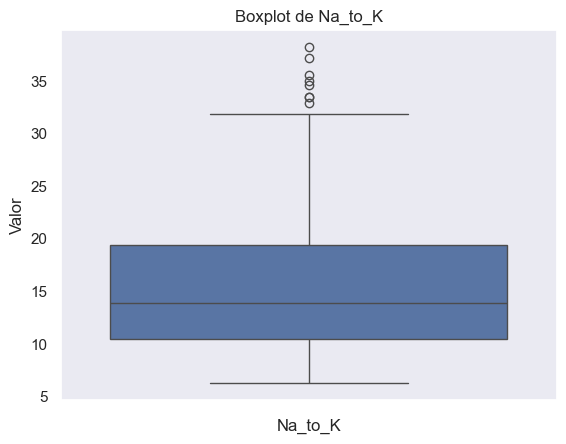

In [16]:
sns.set_theme(style="dark")
sns.boxplot(y ='Na_to_K', data=df)
plt.title('Boxplot de Na_to_K')
plt.xlabel('Na_to_K')
plt.ylabel('Valor')


> **Observación**
> Como se pudo observar en la columna Na_to_K, se cuenta con valores outliers que son mayores a 32

>**Sugerencia**
> Como se pudo observar se cuenta con valores ouliers y se recomienda poder eliminarlo para que no afecte a nuestra predicción

In [17]:
df.loc[df['Na_to_K']>= 31.876].index

Index([24, 33, 96, 98, 128, 131, 184, 188, 194], dtype='int64')

In [18]:
df = df.drop(index=[24, 33, 96, 98, 128, 131, 184, 188, 194])

Text(0, 0.5, 'Valor')

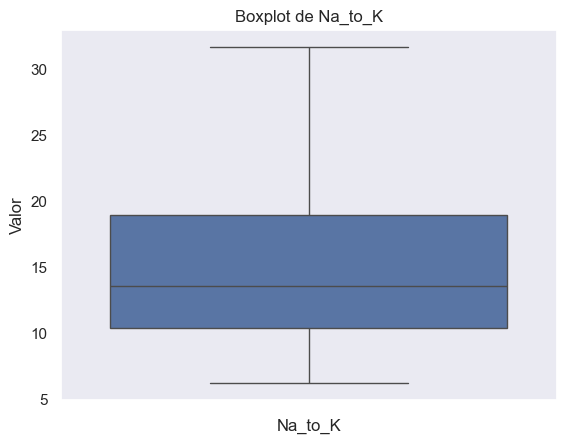

In [94]:
sns.set_theme(style="dark")
sns.boxplot(y ='Na_to_K', data=df)
plt.title('Boxplot de Na_to_K')
plt.xlabel('Na_to_K')
plt.ylabel('Valor')

>**Observación**
> Como se pudo observar en este segundo gráfico ya no tenemos valores outliers

3.2.6 Visualización de valores de la coulumna Drug

Text(0.5, 1.0, 'Gráfico de Drug')

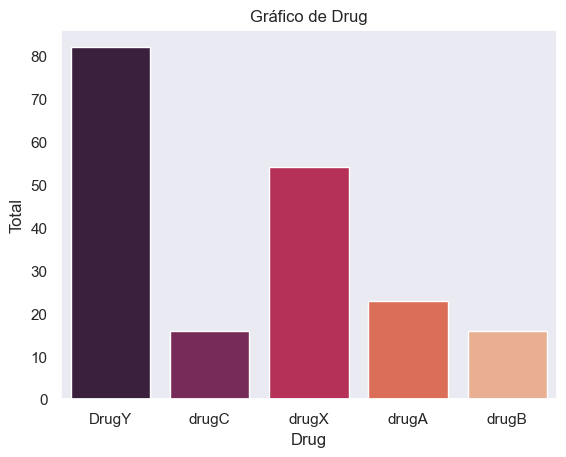

In [19]:
sns.set_theme(style="dark")
sns.countplot(data=df, x="Drug", hue="Drug", palette="rocket", legend=False)
plt.xlabel("Drug")
plt.ylabel("Total")
plt.title("Gráfico de Drug")

In [20]:
df['Drug'].value_counts()

Drug
DrugY    82
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

> **Observación**
> Como se pudo observar en la columna Drug que viene a ser nuestro objectivo a predecir, por ser una variable categorica no cuenta con valores outliers y solo cuenta con 5 categorias que son: `DrugY`, `drugX`, `drugA`, `drugC` y `drugB`

<a id='sec_4'></a>
## 4. Análisis de los datos

En este caso debemos regresar al planteamiento inicial del problema y analizar nuestra data que hemos limpiado anteriormente.

Etapas de Análisis de los datos:

1. Vizualiar distribución de los datos(outliers)

### 4.1. Vizualiar distribución de los datos(outliers)

<Axes: >

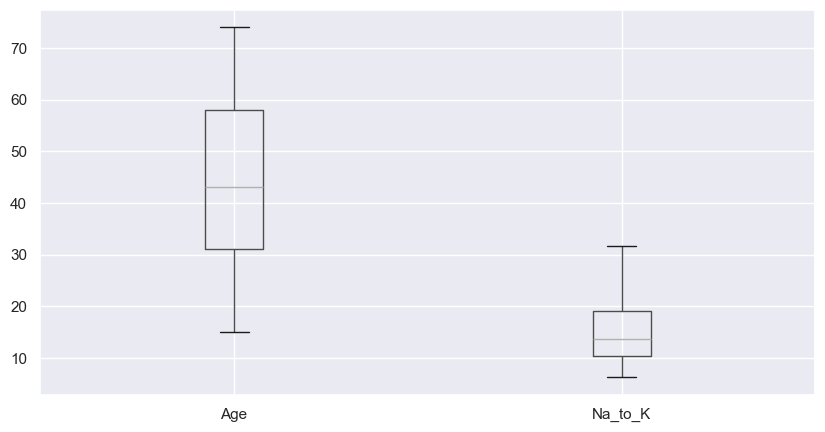

In [21]:
df.boxplot(figsize=(10, 5))

>**Observación**
> No se cuenta con valores outliers

<function matplotlib.pyplot.show(close=None, block=None)>

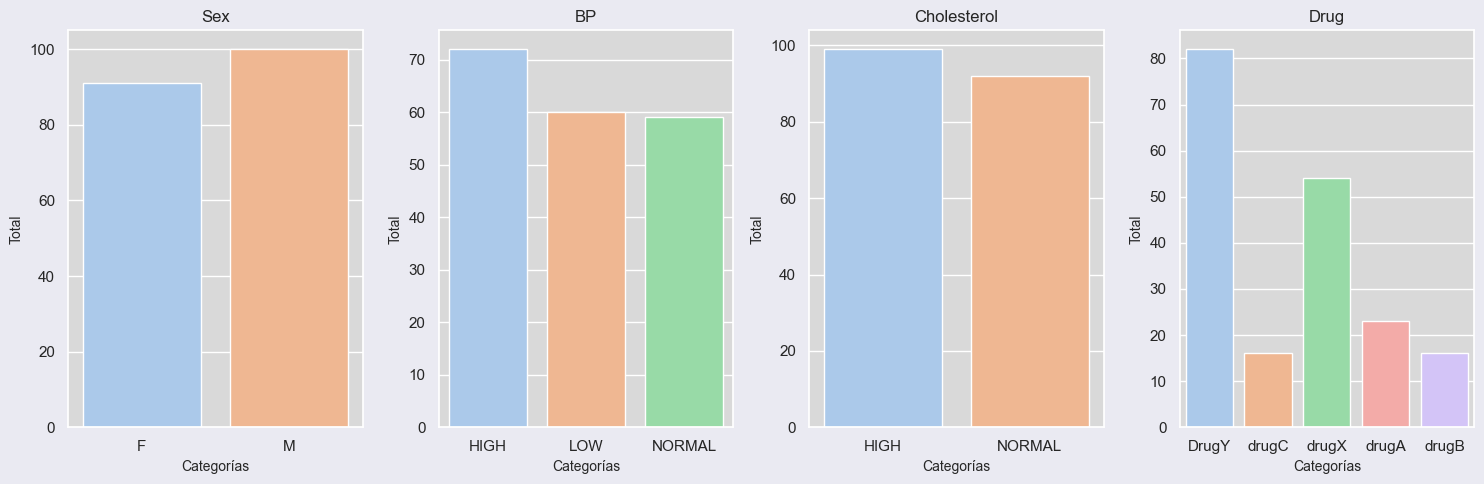

In [22]:
sns.set(style="darkgrid")

plt.rcParams['figure.facecolor'] = '#EAEAF2'
plt.rcParams['axes.facecolor'] = '#D9D9D9'   

columnas_categoricas = df.select_dtypes(include=['object']).columns.tolist()
num_subplots = len(columnas_categoricas)

fig, axes = plt.subplots(nrows=1, ncols=num_subplots, figsize=(15, 5))

for i, columna in enumerate(columnas_categoricas):
    sns.countplot(x = columna, data=df, ax=axes[i], palette='pastel', legend=False,  hue= columna)
    axes[i].set_xlabel('Categorías', fontsize=10)
    axes[i].set_ylabel('Total', fontsize=10)
    axes[i].set_title(columna, fontsize=12)
plt.tight_layout()
plt.show

>**Observación**
> No se cuenta con valores outliers debido a que son variables categoricas

>**Sugerencia**
> Debido a que son variables categorias se sugiere que se pueda transformar a variables numericas para luego nuestra predicción sea eficiente

<a id='sec_5'></a>
## 5. Preprocesamiento

En este caso debemos preprocesar nuestros datos para luego llevarlo a nuestro modelo.

Etapas de Análisis de los datos:

1. Transformación de nuestros datos
2. División de datos
3. Escalando nuestras columnas


### 5.1. Transformación de nuestros datos

Se uso LabelEncode que ayuda transformar etiquetas de texto en números enteros en las columnas Sex, BP, Cholesterol y Drug

In [23]:
from sklearn.preprocessing import LabelEncoder
label_Transfor = LabelEncoder()
df["Sex"] = label_Transfor.fit_transform(df["Sex"])
df["BP"] = label_Transfor.fit_transform(df["BP"])
df["Cholesterol"] = label_Transfor.fit_transform(df["Cholesterol"])
df["Drug"] = label_Transfor.fit_transform(df["Drug"])

In [24]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0


>**Observación**
>Como se puede observar solo se cuentra con columnas númericas luego de haber transfomado con el LabelEncoder

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 191 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          191 non-null    int64  
 1   Sex          191 non-null    int32  
 2   BP           191 non-null    int32  
 3   Cholesterol  191 non-null    int32  
 4   Na_to_K      191 non-null    float64
 5   Drug         191 non-null    int32  
dtypes: float64(1), int32(4), int64(1)
memory usage: 7.5 KB


### 5.2 División de datos

In [26]:
X = df.drop('Drug', axis=1)
X.shape

(191, 5)

In [27]:
y = df['Drug']

### 5.3 Escalando nuestras columnas

In [31]:
from sklearn.compose import make_column_selector
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [32]:

num_selector = make_column_selector(dtype_include='number')

In [33]:
# Standar scaler
standard_scaler = StandardScaler()

In [34]:
col_transformer = make_column_transformer((make_pipeline(standard_scaler), num_selector),
                        remainder = 'passthrough')

col_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000026CE0AE1D50>)])

In [35]:
col_transformer.fit(X)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000026CE0AE1D50>)])

In [36]:
aux = col_transformer.transform(X)

In [37]:
aux=col_transformer.transform(X)
X_procesado=pd.DataFrame(aux,columns=col_transformer.get_feature_names_out())
X_procesado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   pipeline__Age          191 non-null    float64
 1   pipeline__Sex          191 non-null    float64
 2   pipeline__BP           191 non-null    float64
 3   pipeline__Cholesterol  191 non-null    float64
 4   pipeline__Na_to_K      191 non-null    float64
dtypes: float64(5)
memory usage: 7.6 KB


<a id='sec_6'></a>
## 6. Predicción

En este caso debemos usar nuestros modelos de clasificación y evaluar nuestra predicción.

Etapas de Predicción:

1. Entrenamiento de nuestro modelo 
2. Evaluación de nuestra predicción 

### 6.1.1 Entrenamiento de nuestro modelo DecisionTreeClassifier

In [65]:
from sklearn.model_selection import train_test_split

# Partición 70% (train) y resto (40%)
X_train, X_test, y_train, y_test = train_test_split(
   X_procesado,y, test_size=0.3, random_state=123, stratify=y,
)

In [66]:
X_train

,pipeline__Age,pipeline__Sex,pipeline__BP,pipeline__Cholesterol,pipeline__Na_to_K
92,0.710194,0.953939,0.082464,-0.963998,-0.031356
102,-1.351495,0.953939,1.294045,-0.963998,-0.534483
35,-0.320651,0.953939,0.082464,1.037346,-0.208321
64,-0.927030,0.953939,-1.129118,-0.963998,-0.386108
149,0.285728,0.953939,0.082464,-0.963998,-0.767150
...,...,...,...,...,...
71,-0.199375,-1.048285,1.294045,1.037346,1.265073
7,-0.199375,0.953939,0.082464,-0.963998,-0.684993
108,-0.563202,0.953939,0.082464,1.037346,-0.991766
162,0.407004,-1.048285,0.082464,1.037346,1.281176


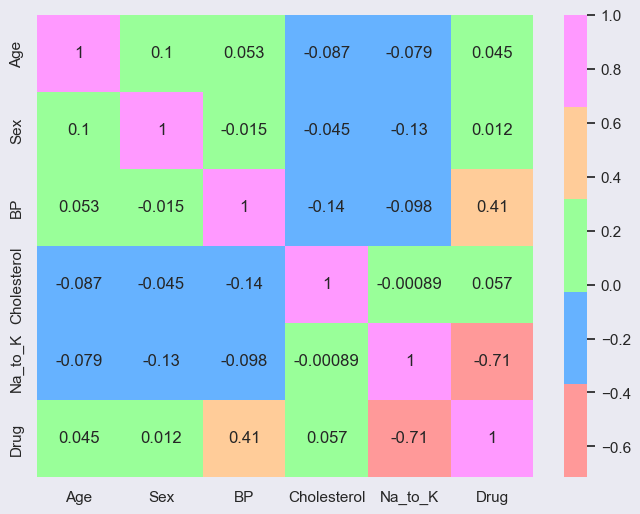

In [67]:
plt.figure(figsize=(8,6))
pastel_colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FF99FF']
sns.heatmap(df.corr(), annot=True, cmap=sns.color_palette(pastel_colors))
plt.show()


In [68]:
print('Tamaños: ')
print('\tDataset original: ', X.shape, y.shape)
print('\tEntrenamiento: ', X_train.shape, y_train.shape)
print('\tTest: ', X_test.shape, y_test.shape)

Tamaños: 
	Dataset original:  (191, 5) (191,)
	Entrenamiento:  (133, 5) (133,)
	Test:  (58, 5) (58,)


In [89]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
dtcpred = dtc.predict(X_test)

print(classification_report(y_test,dtcpred))
print("Accuracy of Decision Tree is : ",accuracy_score(y_test,dtcpred)*100)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.88      1.00      0.93         7
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00        16

    accuracy                           0.98        58
   macro avg       0.97      0.96      0.96        58
weighted avg       0.98      0.98      0.98        58

Accuracy of Decision Tree is :  98.27586206896551


In [129]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np


print("MAE : ",mean_absolute_error(y_test,dtcpred))
print("MSE : ",mean_squared_error(y_test,dtcpred))
print("RMSE : ",np.sqrt(mean_squared_error(y_test,dtcpred)))
print("R2 Score : ",r2_score(y_test,dtcpred))


MAE :  0.017241379310344827
MSE :  0.017241379310344827
RMSE :  0.13130643285972254
R2 Score :  0.9940864600326265


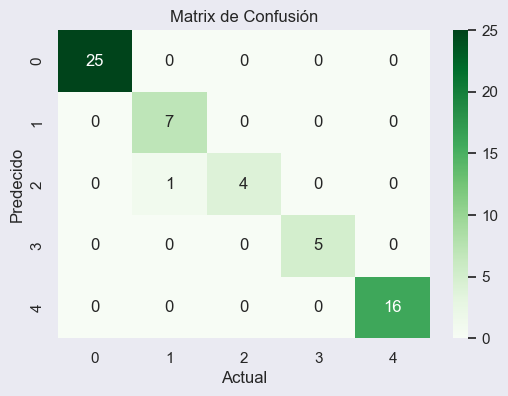

In [136]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test,dtcpred),annot=True,cmap="Greens")
plt.xlabel("Actual")
plt.ylabel("Predecido")
plt.title("Matrix de Confusión")
plt.show()

### 6.1.2 Entrenamiento de nuestro modelo Random Forest

In [131]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rfcpred = rfc.predict(X_test)

print(classification_report(y_test,rfcpred))
print("Accuracy of Random Forest is : ",accuracy_score(y_test,rfcpred)*100)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.78      1.00      0.88         7
           2       1.00      0.60      0.75         5
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00        16

    accuracy                           0.97        58
   macro avg       0.96      0.92      0.93        58
weighted avg       0.97      0.97      0.96        58

Accuracy of Random Forest is :  96.55172413793103


In [132]:
print("MAE : ",mean_absolute_error(y_test,rfcpred))
print("MSE : ",mean_squared_error(y_test,rfcpred))
print("RMSE : ",np.sqrt(mean_squared_error(y_test,rfcpred)))
print("R2 Score : ",r2_score(y_test,rfcpred))

MAE :  0.034482758620689655
MSE :  0.034482758620689655
RMSE :  0.18569533817705186
R2 Score :  0.9881729200652528


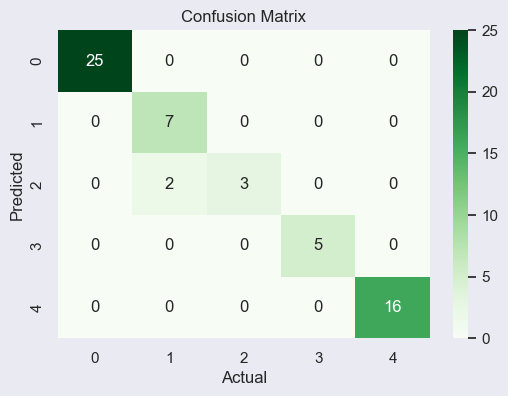

In [125]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test,rfcpred),annot=True,cmap="Greens")
plt.xlabel("Actual")
plt.ylabel("Predecido")
plt.title("Matrix de Confusión")
plt.show()

### 6.1.2 Entrenamiento de nuestro modelo KNN

In [100]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
knnpred = knn.predict(X_test)

print(classification_report(y_test,knnpred))
print("Accuracy of KNN is : ",accuracy_score(y_test,knnpred)*100)

              precision    recall  f1-score   support

           0       0.95      0.80      0.87        25
           1       0.78      1.00      0.88         7
           2       0.80      0.80      0.80         5
           3       0.80      0.80      0.80         5
           4       0.83      0.94      0.88        16

    accuracy                           0.86        58
   macro avg       0.83      0.87      0.85        58
weighted avg       0.87      0.86      0.86        58

Accuracy of KNN is :  86.20689655172413


In [133]:
print("MAE: ",mean_absolute_error(y_test,knnpred))
print("MSE : ",mean_squared_error(y_test,knnpred))
print("RMS : ",np.sqrt(mean_squared_error(y_test,knnpred)))
print("R2 Score : ",r2_score(y_test,knnpred))

MAE:  0.3448275862068966
MSE :  1.103448275862069
RMS :  1.0504514628777804
R2 Score :  0.6215334420880914


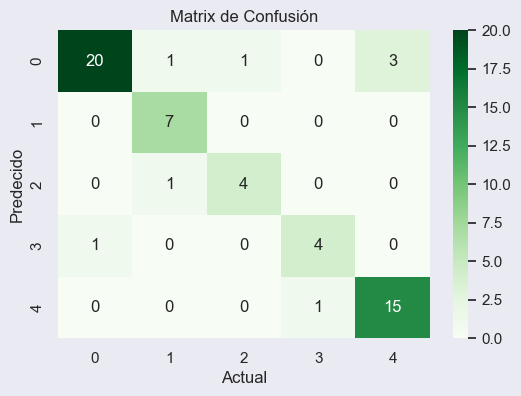

In [135]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test,knnpred),annot=True,cmap="Greens")
plt.xlabel("Actual")
plt.ylabel("Predecido")
plt.title("Matrix de Confusión")
plt.show()

<a id='sec_7'></a>
## 7. Reporte final 

### 7.1. Reporte final
**Rendimiento de los Modelos:**
- En base a la utilizanción de los diferentes modelos que hicimos se pudo observar lo siguiente:

`Modelo DecisionTreeClassifier:`

- Menor Error Absoluto Medio (MAE): 0.0172 Nos indica que las predicciones en promedio están muy cerca de los valores reales.

- Menor Error Cuadrático Medio (MSE): 0.0172 sugiere errores generalmente pequeños.

- Menor Root Mean Squared Error (RMSE): 0.1313 implica un error promedio bajo en la misma unidad de los datos originales.

- Puntaje R²: 0.9941 Nos indica una correlación muy fuerte entre las predicciones y los valores reales.

`Modelo RandomForestClassifier:`

 - Rendimiento ligeramente inferior al Modelo 1 en todas las métricas.

 - Presenta el doble de error promedio (MAE y MSE) comparado al Modelo 1.

 - Posiblemente tenga algunos casos con errores más grandes (RMSE ligeramente superior).

 - Todavía tiene un R² (0.9882), lo que indica una buena correlación.

`Modelo knn:`

 - Rendimiento significativamente inferior a los Modelos 1 y 2.

 - Errores promedio mucho más altos (MAE y MSE) en comparación con los otros modelos.

 - RMSE sustancialmente mayor, lo que sugiere muchos casos con errores significativos.

 - Puntaje R² (0.6215) Nos indica una correlación débil entre las predicciones y los valores reales.

**Desición final y elección del Mejor Modelo:**

Se concluye y se toma que el Modelo Modelo DecisionTreeClassifier se destaca por su precisión y exactitud en la predicción, de la misma manera sus métricas nos indica errores consistentemente bajos y una fuerte correlación con los valores reales. 

>**Sugerencia**
>Se sugiere que se pueda trabajar con más datos , debio a que nuesta población es demasiada pequeña pueda que
>existe overfitting y lo recomendable es un dataset (población) mayor para una predicción mejor. 


